In [ ]:
#INSTALAR LIBRERIAS
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install openpyxl
!pip install scikit

ERROR: Could not find a version that satisfies the requirement scikit (from versions: none)
ERROR: No matching distribution found for scikit


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [1]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

CARGA DE ARCHIVO .CSV

In [2]:
#Convertimos el dataset en dataframe
df= pd.read_csv("titanic.csv")
df

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
#Verificamos información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


In [4]:
#Sustituir valores nulos por valores no nulos hacia adelante forward fill" ("ffill")
df["age"] =df["age"].fillna(method="ffill") 

C:\Users\alfre\AppData\Local\Temp\ipykernel_26516\4155997615.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["age"] =df["age"].fillna(method="ffill")


***SEGMENTACIÓN POR CATEGORIZACIÓN MANUAL***

In [5]:
#Categorizamos por intervalos y obtenemos una nueva columna "Edad"
Edad = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=['Joven', 'Adulto', 'Mayor'])

In [6]:
#Insertamos la nueva columna o array creado en el dataframe
df.insert(loc=5, column='Edad', value= Edad)
df

,Unnamed: 0,survived,pclass,sex,age,Edad,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,Joven,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,Adulto,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,Joven,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,Adulto,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,Adulto,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,Joven,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,Joven,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,19.0,Joven,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,Joven,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


C:\Users\alfre\AppData\Local\Temp\ipykernel_776\217670102.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Edad', data=df, palette='Set2')


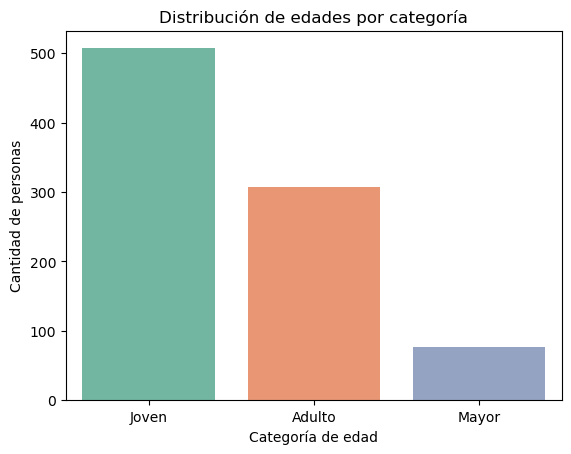

In [69]:
# Gráfico de barras
sns.countplot(x='Edad', data=df, palette='Set2')
plt.title('Distribución de edades por categoría')
plt.xlabel('Categoría de edad')
plt.ylabel('Cantidad de personas')
plt.show()

***SEGMENTACIÓN POR CLUSTERING 1D***

In [7]:
# Preparamos los datos para clustering
X = df[['age']].values 
X

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [35.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [ 2.  ],
       [31.  ],
       [31.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [38.  ],
       [19.  ],
       [19.  ],
       [19.  ],
       [40.  ],
       [40.  ],
       [40.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [42.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [27.  ],
       [ 3.  ],
       [19.  ],
       [19.  ],
       [19.  ],
       [19.  ],
       [19.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [65.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [8]:
# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans

KMeans(n_clusters=3, random_state=42)

In [9]:
#Entrenamos el modelo y obtenemos etiquetas predecidas
etiquetas = kmeans.fit_predict(X)
etiquetas

array([0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1, 0,
       2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 1,
       1, 2, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0,
       0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 1,
       1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1,
       1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2,

In [10]:
#Obtenemos los centroides finales del modelo K-means
centroides = kmeans.cluster_centers_
centroides

array([[15.95464183],
       [32.47643979],
       [52.39375   ]])

In [11]:
# Agregamos la columna cluster_1D con las etiquetas obtenidas en una posición específica
df.insert(loc=6, column='cluster_1D', value= etiquetas)
df

,Unnamed: 0,survived,pclass,sex,age,Edad,cluster_1D,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,Joven,0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,Adulto,1,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,Joven,1,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,Adulto,1,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,Adulto,1,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,Joven,1,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,Joven,0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,19.0,Joven,0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,Joven,1,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


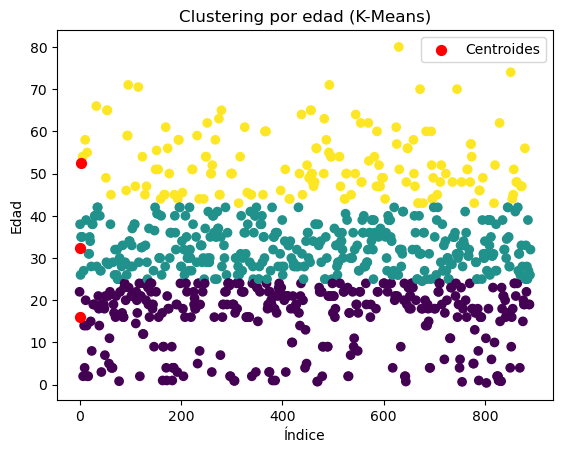

In [12]:
# Para visualizar en 1D, puedes usar el índice como eje X
plt.scatter(range(len(X)), X[:, 0], c=etiquetas, cmap='viridis')
plt.scatter([i for i in range(len(centroides))], centroides[:, 0], 
            c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por edad (K-Means)")
plt.xlabel("Índice")
plt.ylabel("Edad")
plt.legend()
plt.show()


***Comparación de entre segmentación por CATEGORIAS y CLUSTERING***

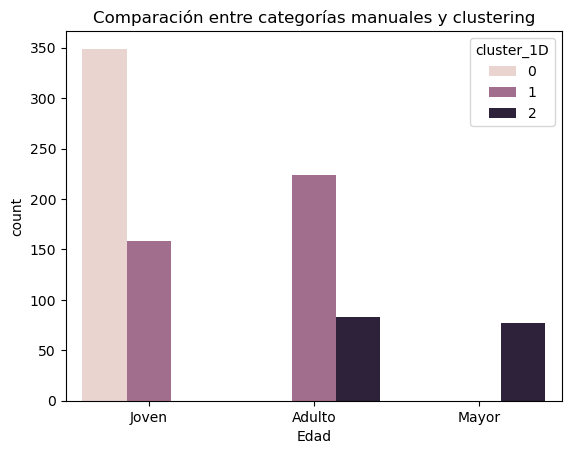

In [13]:

sns.countplot(data=df, x='Edad', hue='cluster_1D')
plt.title("Comparación entre categorías manuales y clustering")
plt.show()

***SEGMENTACIÓN POR CLUSTERING 2D***

In [14]:
# Seleccionamos dos columnas numéricas para clustering
X = df[['age', 'fare']].values
X

array([[22.    ,  7.25  ],
       [38.    , 71.2833],
       [26.    ,  7.925 ],
       ...,
       [19.    , 23.45  ],
       [26.    , 30.    ],
       [32.    ,  7.75  ]])

In [15]:
#Aplicamos K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans

KMeans(n_clusters=3, random_state=42)

In [16]:
#Entrenamos el modelo
etiquetas = kmeans.fit_predict(X)
etiquetas

array([0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0,

In [17]:
#Obtenemos los centroides finales del modelo K-means
centroides = kmeans.cluster_centers_
centroides

array([[ 28.59086301,  15.50127767],
       [ 32.95      , 279.308545  ],
       [ 34.2329078 ,  83.63011135]])

In [18]:
# Agregamos la columna cluster_2D con las etiquetas obtenidas en una posición específica
df.insert(loc=7, column='cluster_2D', value= etiquetas)
df


,Unnamed: 0,survived,pclass,sex,age,Edad,cluster_1D,cluster_2D,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,Joven,0,0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,Adulto,1,2,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,Joven,1,0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,Adulto,1,2,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,Adulto,1,0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,Joven,1,0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,Joven,0,0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,19.0,Joven,0,0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,Joven,1,0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


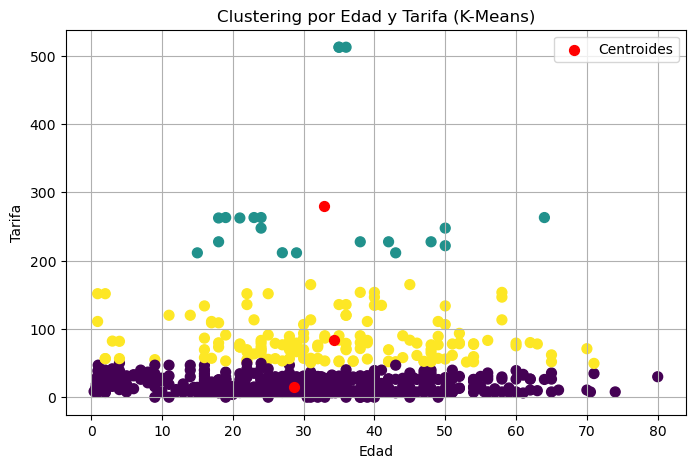

In [19]:
# Para visualizar en 2D, Se utiliza una variable como eje X y la otra variable como eje Y
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por Edad y Tarifa (K-Means)")
plt.xlabel("Edad")
plt.ylabel("Tarifa")
plt.legend()
plt.grid(True)
plt.show()

***SEGMENTACIÓN POR CLUSTERING 3D o Mayor***

In [20]:
# Seleccionamos dos columnas numéricas para clustering
X = df[['age', 'fare', 'survived', 'pclass']].values
X

array([[22.    ,  7.25  ,  0.    ,  3.    ],
       [38.    , 71.2833,  1.    ,  1.    ],
       [26.    ,  7.925 ,  1.    ,  3.    ],
       ...,
       [19.    , 23.45  ,  0.    ,  3.    ],
       [26.    , 30.    ,  1.    ,  1.    ],
       [32.    ,  7.75  ,  0.    ,  3.    ]])

In [21]:
# Escalamos o Normalizamos los datos 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
#Aplicamos K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans

KMeans(n_clusters=3, random_state=42)

In [23]:
#Entrenamos el modelo
etiquetas = kmeans.fit_predict(X_scaled)
etiquetas

array([0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1,
       0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 2,
       0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2,
       2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 1, 1, 1, 2,

In [24]:
#Obtenemos los centroides finales del modelo K-means
centroides = kmeans.cluster_centers_
centroides

array([[-0.60219048, -0.34979911, -0.14040739,  0.68110877],
       [ 0.29758033,  0.96121592,  1.12858754, -1.2324    ],
       [ 0.89737771, -0.18250349, -0.73632138, -0.21527788]])

In [25]:

# Agregamos la columna cluster_2D con las etiquetas obtenidas en una posición específica
df.insert(loc=8, column='cluster_4D', value= etiquetas)
df


,Unnamed: 0,survived,pclass,sex,age,Edad,cluster_1D,cluster_2D,cluster_4D,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,Joven,0,0,0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,Adulto,1,2,1,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,Joven,1,0,0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,Adulto,1,2,1,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,Adulto,1,0,0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,Joven,1,0,2,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,Joven,0,0,1,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,19.0,Joven,0,0,0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,Joven,1,0,1,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [26]:
# Reducimos a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroides_pca=pca.fit_transform(centroides)

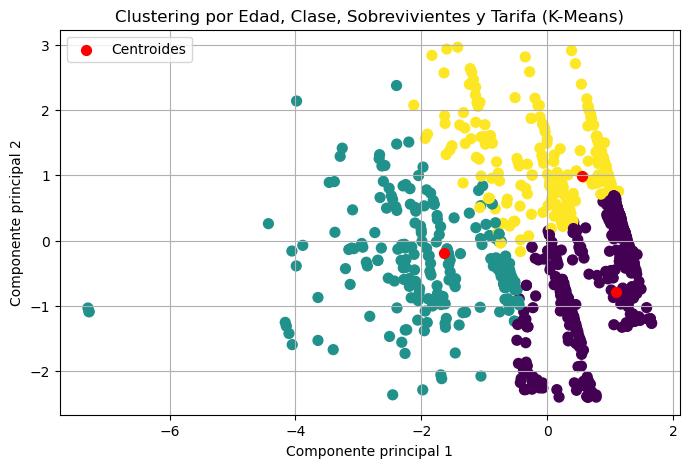

In [90]:
# Para visualizar en 4D, Se reduce a 2 dimensiones 
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por Edad, Clase, Sobrevivientes y Tarifa (K-Means)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()